# House Price Prediction

In [28]:
# Install libraries
!pip install -q pandas numpy scikit-learn matplotlib seaborn tensorflow

In [29]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split


# 1. Dataset Details

In [77]:
# Load dataset
data = pd.read_csv("house-prices-advanced-regression-techniques/train.csv", keep_default_na=False, na_values=['']) # Not consider NA as missing values, since it is a category for some columns

In [78]:
data.shape

(1460, 81)

In [79]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,2,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,3,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,4,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Id             1460 non-null   int64 
 1   MSSubClass     1460 non-null   int64 
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   object
 4   LotArea        1460 non-null   int64 
 5   Street         1460 non-null   object
 6   Alley          1460 non-null   object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64 
 18  OverallCond    1460 non-null

# 2. Exploratory Data Analysis (EDA)

The initial step involves conducting an exploratory data analysis (EDA) to understand the distribution and basic statistics of the dataset. This report presents a summary of the dataset using descriptive statistics.

## 2.1. Summary Statistics

### 2.1.1. Numerical Variables

The dataset comprises several numerical variables that provide quantitative insights into the features of the houses. Below is a brief overview of the key numerical variables:

In [81]:
# Descriptive statistics of numerical variables
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0
BsmtFinSF2,1460.0,46.549315,161.319273,0.0,0.00,0.0,0.00,1474.0
BsmtUnfSF,1460.0,567.240411,441.866955,0.0,223.00,477.5,808.00,2336.0


#### Analysis and Interpretation

 **Count:** The count indicates that most features have data for all 1,460 observations, except for some features such as LotFrontage, MasVnrArea, and GarageYrBlt, which have missing values.

**Central Tendency:** The mean and median (50th percentile) values provide insights into the central tendency of the features. For instance, the average SalePrice is approximately $180,921, with a median of $163,000, indicating a slight right-skew in the distribution.

**Spread:** The standard deviation (std) measures the dispersion of the data. Features like LotArea and SalePrice exhibit high variability, as indicated by their large standard deviations.

**Minimum and Maximum Values:** These values help identify the range of the data. For instance, SalePrice ranges from $34,900 to $755,000, showing a significant spread in house prices.

**Interquartile Range (IQR):** The 25th percentile (Q1) and 75th percentile (Q3) values help in understanding the spread of the middle 50% of the data. Features such as OverallQual, YearBuilt, and GrLivArea show a relatively narrow IQR, indicating less variability in the middle range of these features.

### 2.1.1. Categorical Variables

Categorical variables in the dataset provide qualitative insights into various features of the houses. The table below summarizes the count, unique values, most frequent category (top), and the frequency of the top category (freq) for each categorical variable.

In [82]:
# Descriptive statistics of categorical variables
cat_desc = data.describe(include=['object']).transpose()
cat_desc.sort_values(by='count', ascending=False, inplace=True)
cat_desc

,count,unique,top,freq
MSZoning,1460,5,RL,1151
FireplaceQu,1460,6,NA,690
BsmtExposure,1460,5,No,953
BsmtFinType1,1460,7,Unf,430
BsmtFinType2,1460,7,Unf,1256
Heating,1460,6,GasA,1428
HeatingQC,1460,5,Ex,741
CentralAir,1460,2,Y,1365
Electrical,1460,6,SBrkr,1334
KitchenQual,1460,4,TA,735


#### Analysis and Interpretation

**MSZoning:** The majority of the houses are in the "RL" (Residential Low Density) zone, accounting for 1151 out of 1460 houses. This indicates a predominance of low-density residential areas in the dataset.

**Exterior1st and Exterior2nd:** "VinylSd" (Vinyl Siding) is the most common exterior material for both the first and second exteriors, with 515 and 504 occurrences respectively. This suggests a preference for vinyl siding in house construction.

**SaleType:** The "WD" (Warranty Deed) sale type is overwhelmingly the most frequent, with 1267 occurrences, indicating that most houses are sold with a warranty deed.

**PavedDrive:** The vast majority of houses (1340 out of 1460) have a paved driveway, which is a standard feature in the dataset.

**Functional:** Most houses are described as "Typ" (Typical function), with 1360 occurrences, suggesting that the majority of homes are considered to have typical functionality without significant issues.

**KitchenQual:** "TA" (Typical/Average) is the most frequent kitchen quality rating, appearing 735 times. This indicates that most kitchens are of average quality.

**CentralAir:** A significant majority (1365 out of 1460) of houses have central air conditioning, highlighting it as a common feature.

**HeatingQC:** "Ex" (Excellent) is the most frequent heating quality rating, with 741 occurrences, suggesting that many homes have high-quality heating systems.

**Heating:** "GasA" (Gas forced air) is the predominant heating type, with 1428 houses using this system, indicating its popularity in the dataset.

**Street:** Almost all houses (1454 out of 1460) have paved streets, which is expected in urban or suburban residential areas.

**Foundation:** "PConc" (Poured Concrete) is the most common foundation type, with 647 occurrences, indicating a preference for this type of foundation.

**ExterCond and ExterQual:** Both exterior condition and quality ratings are predominantly "TA" (Typical/Average), with 1282 and 906 occurrences respectively, suggesting average exterior conditions and quality for most houses.

**SaleCondition:** "Normal" sale conditions are the most frequent, with 1198 occurrences, indicating that most house sales occur under typical market conditions.

**RoofMatl:** "CompShg" (Composition Shingles) is the most common roofing material, with 1434 occurrences, highlighting its widespread use.

**LandSlope:** "Gtl" (Gentle slope) is the most common land slope, with 1382 occurrences, suggesting that most houses are built on gently sloping land.

**LotShape:** The "Reg" (Regular) lot shape is the most frequent, with 925 occurrences, indicating a prevalence of regular-shaped lots.

**HouseStyle:** "1Story" (One-story) houses are the most common style, with 726 occurrences, suggesting a preference for single-story homes.

**BldgType:** "1Fam" (Single-family) homes are the most common building type, with 1220 occurrences, indicating that the dataset primarily consists of single-family houses.

**Condition1 and Condition2:** Both primary and secondary conditions are predominantly "Norm" (Normal), with 1260 and 1445 occurrences respectively, suggesting typical surrounding conditions for most houses.

**LandContour:** "Lvl" (Level) land contour is the most common, with 1311 occurrences, indicating that most houses are built on level land.

**Utilities:** Almost all houses (1459 out of 1460) have "AllPub" (All public utilities), which is expected in developed residential areas.

**RoofStyle:** "Gable" roofs are the most common style, with 1141 occurrences, highlighting their popularity.

**LotConfig:** "Inside" lots are the most common configuration, with 1052 occurrences, suggesting that most houses are situated on internal lots rather than corner or other configurations.

**Neighborhood:** "NAmes" (North Ames) is the most frequent neighborhood, with 225 houses, indicating a concentration of data in this area.

**Electrical:** The "SBrkr" (Standard Circuit Breaker) electrical system is the most common, with 1334 occurrences, indicating it as the standard.

**Basement Features (BsmtFinType1 and BsmtFinType2):** Both types of basement finishing are most frequently "Unf" (Unfinished), with 430 and 1256 occurrences respectively, indicating many houses

## 2.2. House Prices Visualization

The next phase of the exploratory data analysis (EDA) involves visualizing the distribution of house prices. Visualization serves as an effective tool to comprehend the spread, central tendency, and potential outliers within the dataset. To facilitate this, two types of plots will be utilized:

**Histogram:** This plot will illustrate the frequency distribution of house prices, enabling observation of how prices are distributed across various ranges.

**Boxplot:** This plot will summarize the house prices through their quartiles, indicating the median, interquartile range, and potential outliers.

These visualizations will provide essential insights into the characteristics of house prices and will inform subsequent steps in the analysis and modeling process.

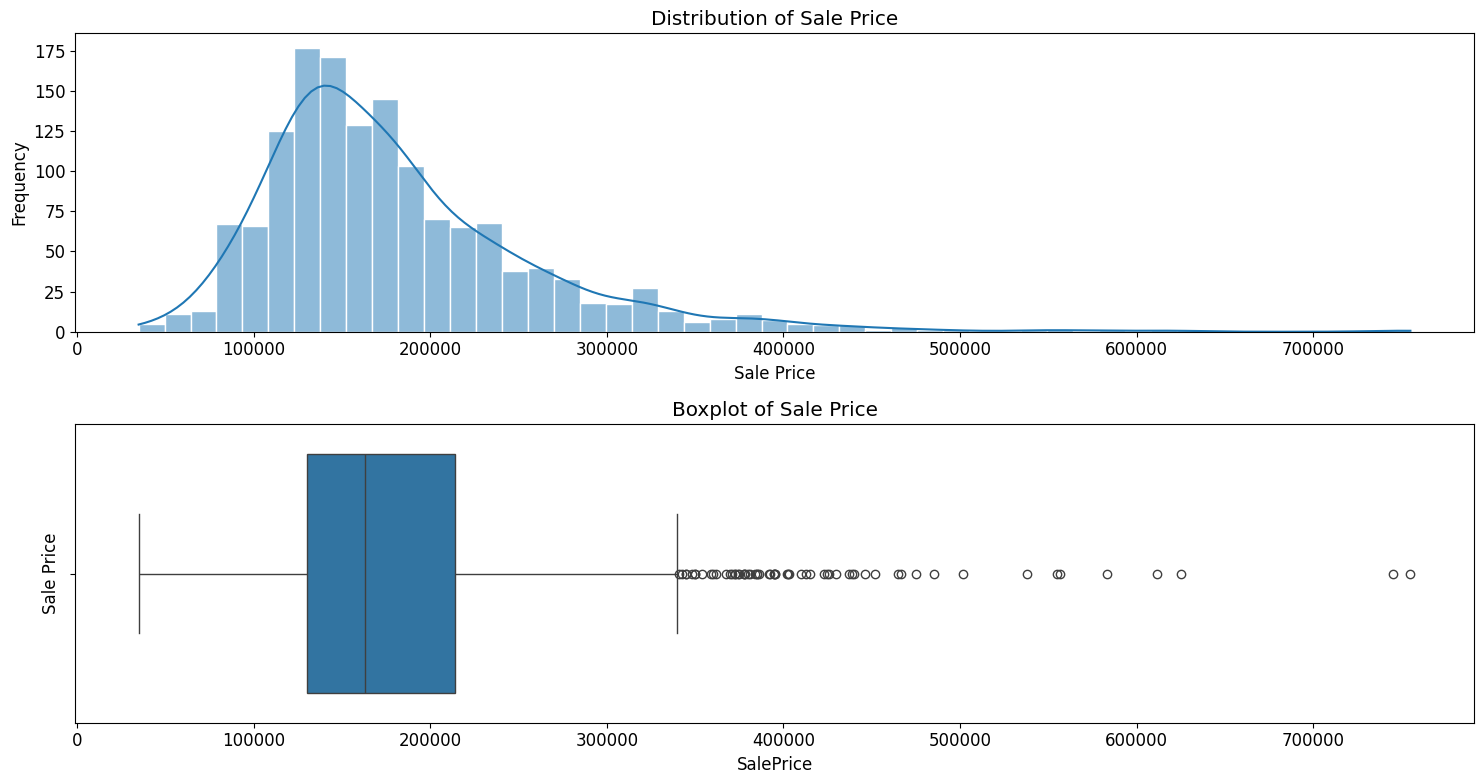

In [83]:
# Visualize house prices
fig = plt.figure(figsize=(15, 8))
fig.add_subplot(2,1,1)
sns.histplot(data['SalePrice'], kde=True, edgecolor='white')
plt.title('Distribution of Sale Price')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')

fig.add_subplot(2,1,2)
sns.boxplot(data['SalePrice'], orient='h')
plt.title('Boxplot of Sale Price')
plt.ylabel('Sale Price')
plt.tight_layout()

The histogram illustrates the frequency distribution of house prices:

**Distribution Shape:** The distribution of house prices appears to be right-skewed, with a higher frequency of houses in the lower price ranges. This indicates that most houses are priced below $200,000.

**Peak Frequency:** The highest frequency of house prices is observed around the $100,000 to $150,000 range.

**Tail:** There is a long tail extending towards the higher price ranges, with fewer houses priced above $400,000. This suggests the presence of some high-value properties, but they are relatively rare compared to lower-priced homes.

The boxplot provides a summary of the house prices through their quartiles:

**Median:** The median sale price is approximately $163,000, indicating that half of the houses are priced below this value.

**Interquartile Range (IQR):** The IQR, represented by the box, spans from approximately $130,000 (25th percentile) to $214,000 (75th percentile). This range captures the middle 50% of house prices.

**Whiskers:** The whiskers extend from the lower quartile to the minimum and from the upper quartile to approximately $350,000. Prices beyond these points are considered outliers.

**Outliers:** There are numerous outliers above $350,000, highlighting houses that are priced significantly higher than the majority. These outliers suggest a wide range of house prices, with some properties being considerably more expensive.

## 2.3. Correlation Matrix

A correlation matrix is a table that shows the correlation coefficients between variables. Each cell in the matrix represents the correlation between two variables. This analysis is essential for identifying the relationships and dependencies between the features, as well as understanding how they are related to the target variable, SalePrice.

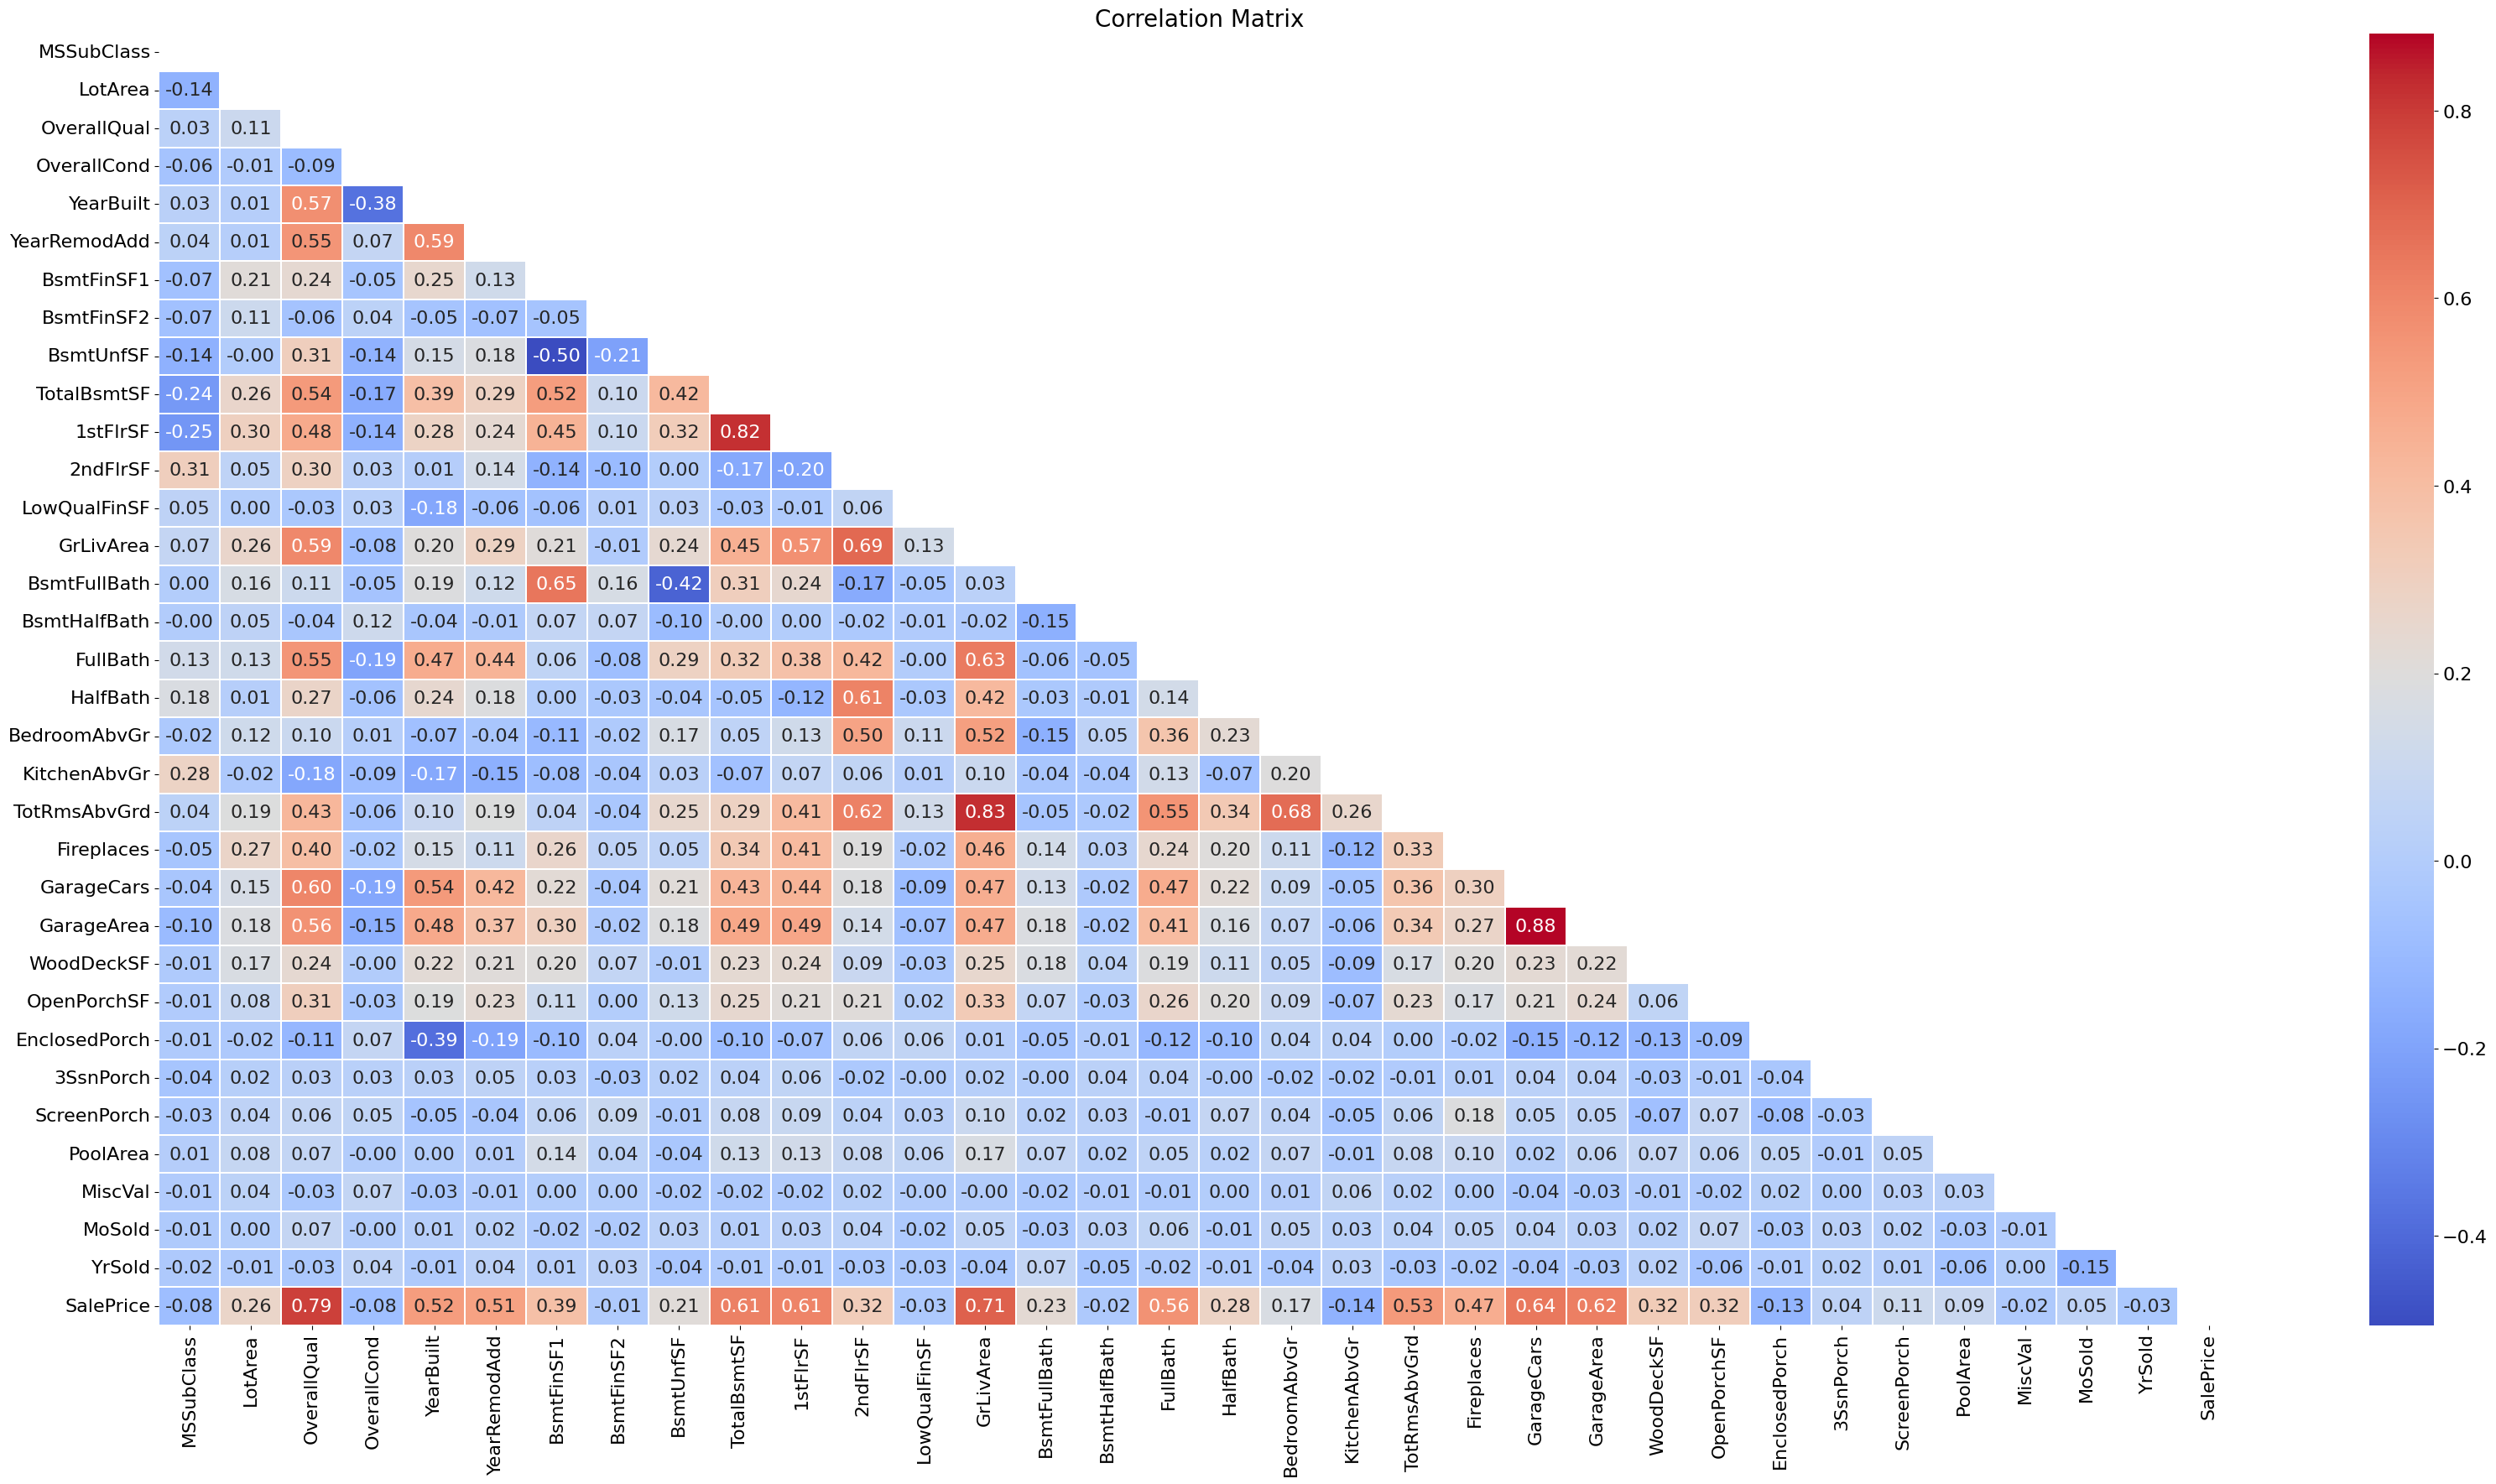

In [84]:
# Correlation matrix
numeric = data.select_dtypes(include=['int64', 'float64'])
numeric = numeric.drop(columns=['Id']) # Drop column with no significant meaning for the analysis
correl = numeric.corr()
plt.figure(figsize=(40, 20))
plt.rcParams['font.size'] = 16
mask = np.triu(np.ones_like(correl, dtype=bool))
sns.heatmap(correl, cmap='coolwarm', mask=mask, annot=True, fmt='.2f', linewidths=0.25)
plt.title('Correlation Matrix', fontsize=20)
plt.show()

The correlation matrix provided focuses exclusively on the numeric variables within the dataset, excluding the Id variable, which is not significant for this analysis. Additionally, to enhance visualization, the top triangle of the correlation matrix has been removed.

**Key Observations - Correlations with SalesPrice:**

Strong Positive Correlations:

OverallQual: The overall quality of the house shows a strong positive correlation with SalePrice (0.79), indicating that houses with higher quality ratings tend to have higher prices.

GrLivArea: The above-ground living area also exhibits a strong positive correlation with SalePrice (0.71), suggesting that larger living areas are associated with higher house prices.

TotalBsmtSF: The total square feet of the basement area has a significant positive correlation with SalePrice (0.61), highlighting the value added by larger basements.

GarageCars and GarageArea: Both the number of cars the garage can hold (0.64) and the garage area (0.62) are strongly correlated with SalePrice, indicating that larger garages contribute to higher house prices.

Moderate Positive Correlations with SalePrice:

1stFlrSF (First Floor Square Feet): Shows a moderate positive correlation with SalePrice (0.56).

FullBath (Number of Full Bathrooms): Also has a moderate positive correlation with SalePrice (0.56).

YearBuilt and YearRemodAdd: Both the year the house was built (0.52) and the year it was remodeled (0.51) have moderate positive correlations with SalePrice, suggesting newer and remodeled houses are more expensive.

Negative Correlations:

EnclosedPorch: Displays a weak negative correlation with SalePrice (-0.12), indicating that larger enclosed porch areas may slightly reduce the house price.

KitchenAbvGr: The number of kitchens above ground shows a weak negative correlation with SalePrice (-0.13).

**Key Observations - High Correlations Among Independent Variables:**

GarageCars and GarageArea: These two features are highly correlated with each other (0.88), which is expected as a larger garage area can accommodate more cars.

TotalBsmtSF and 1stFlrSF: These features also show a high correlation (0.82), indicating that houses with larger basements tend to have larger first floors.

Given the large number of features, it is practical to create a dataframe to sort and identify the strongest correlations with SalePrice. This approach will help in selecting the most significant variables for the predictive model and addressing potential multicollinearity issues.

In [85]:
# Get the absolute correlation of each feature with the target variable
most_correlated = correl['SalePrice'].abs().sort_values(ascending=False)
most_correlated = pd.DataFrame(most_correlated) # Convert to DataFrame for better visualization
most_correlated.columns = ['Abs_Correlation']
most_correlated = most_correlated.round(2)
most_correlated

,Abs_Correlation
SalePrice,1.00
OverallQual,0.79
GrLivArea,0.71
GarageCars,0.64
GarageArea,0.62
TotalBsmtSF,0.61
1stFlrSF,0.61
FullBath,0.56
TotRmsAbvGrd,0.53
YearBuilt,0.52


## 2.4. Visualizations

Visualizations are a critical component of data analysis, providing a clear and intuitive way to understand complex datasets. In this section, various types of visualizations will be employed to enhance the exploratory data analysis and uncover underlying patterns and relationships within the house prices dataset. Scatterplots will be used to explore the relationships between continuous variables and SalePrice, allowing for the identification of trends, correlations, and outliers. Boxplots will be utilized to examine the distribution of SalePrice across different categories of non-continuous and categorical variables, highlighting variations and potential anomalies. 

Additionally, other visualization techniques will be applied as necessary to provide a comprehensive view of the data, facilitating a deeper understanding and more informed decision-making in the modeling process. These visualizations will be essential in revealing insights that may not be immediately apparent through numerical analysis alone, thereby strengthening the overall analysis and guiding the development of a robust predictive model.

### 2.4.1. Continuous Features

Based on the correlation analysis, the following continuous features have been selected for further visualization using scatterplots:

GrLivArea (Above-ground Living Area): With a correlation of 0.71 with SalePrice, this feature is strongly associated with house prices. Larger above-ground living areas tend to correspond to higher sale prices.

GarageArea (Garage Area): This feature has a correlation of 0.62 with SalePrice, indicating that the size of the garage significantly impacts house prices.

TotalBsmtSF (Total Basement Area): With a correlation of 0.61, the total basement area is another key feature influencing house prices. Larger basements contribute positively to the house value.

1stFlrSF (First Floor Area): This feature shows a correlation of 0.56 with SalePrice, suggesting that the size of the first floor is an important factor in determining house prices.

**Purpose of Scatterplots**

Scatterplots will be utilized to visualize the relationships between these selected continuous features and SalePrice. These plots will help in understanding how changes in these features are associated with changes in house prices, and will allow for the identification of potential trends, patterns, and outliers.

By focusing on these four continuous features, the scatterplots will provide clear and actionable insights into the key determinants of house prices, aiding in the development of an accurate predictive model.

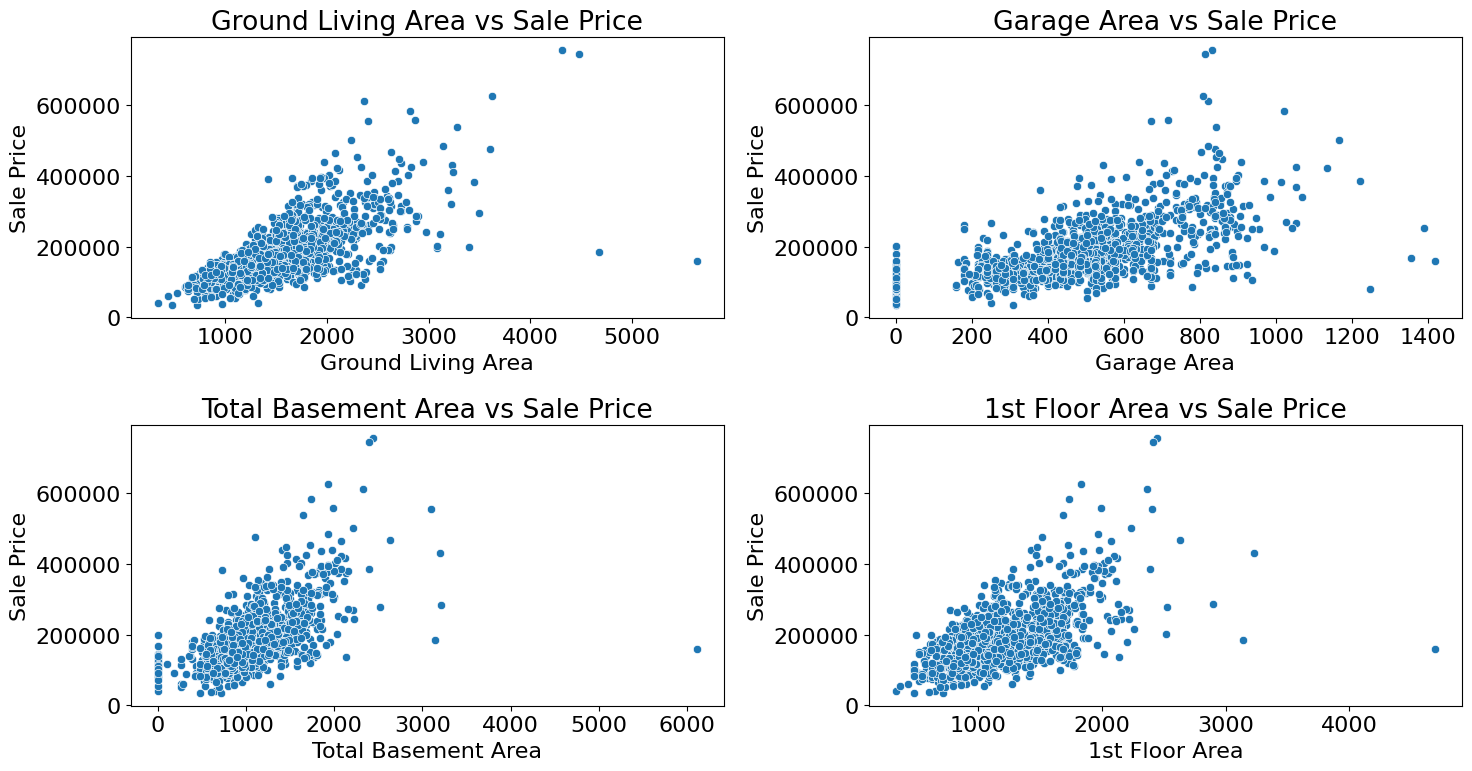

In [86]:
# Visualize the most correlated continuous features (GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF) with the target variable (SalePrice)
fig = plt.figure(figsize=(15, 8))

# Scatter plot of GrLivArea (Above ground living area square feet) vs SalePrice
fig.add_subplot(2,2,1)
sns.scatterplot(x=data['GrLivArea'], y=data['SalePrice'], edgecolor='white')
plt.title('Ground Living Area vs Sale Price')
plt.xlabel('Ground Living Area')
plt.ylabel('Sale Price')

# Scatter plot of GarageArea (Size of garage in square feet) vs SalePrice
fig.add_subplot(2,2,2)
sns.scatterplot(x=data['GarageArea'], y=data['SalePrice'], edgecolor='white')
plt.title('Garage Area vs Sale Price')
plt.xlabel('Garage Area')
plt.ylabel('Sale Price')

# Scatter plot of TotalBsmtSF (Total square feet of basement area) vs SalePrice
fig.add_subplot(2,2,3)
sns.scatterplot(x=data['TotalBsmtSF'], y=data['SalePrice'], edgecolor='white')
plt.title('Total Basement Area vs Sale Price')
plt.xlabel('Total Basement Area')
plt.ylabel('Sale Price')

# Scatter plot of TotalBsmtSF (First Floor square feet) vs SalePrice
fig.add_subplot(2,2,4)
sns.scatterplot(x=data['1stFlrSF'], y=data['SalePrice'], edgecolor='white')
plt.title('1st Floor Area vs Sale Price')
plt.xlabel('1st Floor Area')
plt.ylabel('Sale Price')

plt.tight_layout()


The scatterplots confirm the findings from the correlation matrix analysis, showing that GrLivArea, GarageArea, TotalBsmtSF, and 1stFlrSF are all positively correlated with SalePrice. These visualizations support the conclusion that larger areas in these specific features generally lead to higher house prices. The presence of outliers in each scatterplot suggests that while the general trend holds, there are exceptional cases that may need further investigation or special handling in the predictive modeling process.

### 2.4.2. Non-Continuous Features

In addition to the continuous features analyzed through scatterplots, several non-continuous features have been selected for further exploration to understand their impact on house prices. The chosen features are OverallQual, GarageCars, FullBath, TotRmsAbvGrd, YearBuilt, and YearRemodAdd. These features have been identified based on their significant correlations with SalePrice and their categorical or ordinal nature.

OverallQual: Represents the overall material and finish quality of the house, which has a strong positive correlation with SalePrice (0.79). This feature is a key determinant of house value.

GarageCars: Indicates the capacity of the garage in terms of the number of cars, with a significant correlation of 0.64 with SalePrice, reflecting the functionality and value addition of the garage space.

FullBath: The number of full bathrooms, which has a correlation of 0.56 with SalePrice, is an essential feature contributing to the convenience and appeal of the house.

TotRmsAbvGrd: The total number of rooms above ground, showing a correlation of 0.53 with SalePrice, provides a measure of the house's size and utility.

YearBuilt: The year the house was originally constructed, with a correlation of 0.52 with SalePrice, indicating the age of the property and its potential impact on value.

YearRemodAdd: The year when the house was remodeled or added, reflecting updates and improvements made to the house, and having a correlation of 0.51 with SalePrice.

**Purpose of Boxplots**

To analyze these features, boxplots will be employed. Boxplots are effective for visualizing the distribution of SalePrice across different categories of these non-continuous features. They highlight the median, quartiles, and potential outliers, providing a clear comparison of house prices based on varying levels of these features.

Boxplots will offer insights into how different levels or categories of these features influence house prices, informing the development of a predictive model and enhancing the understanding of key factors driving house value.

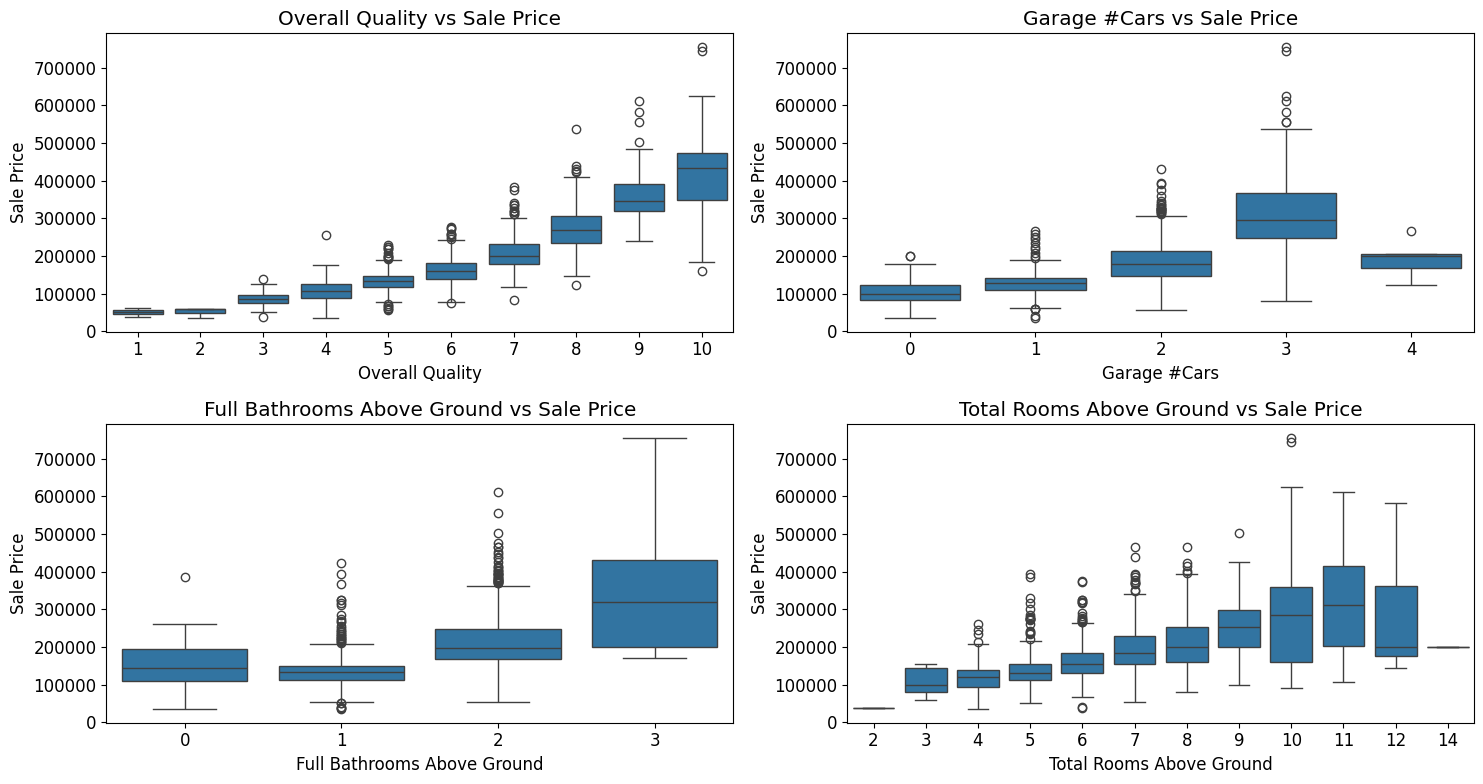

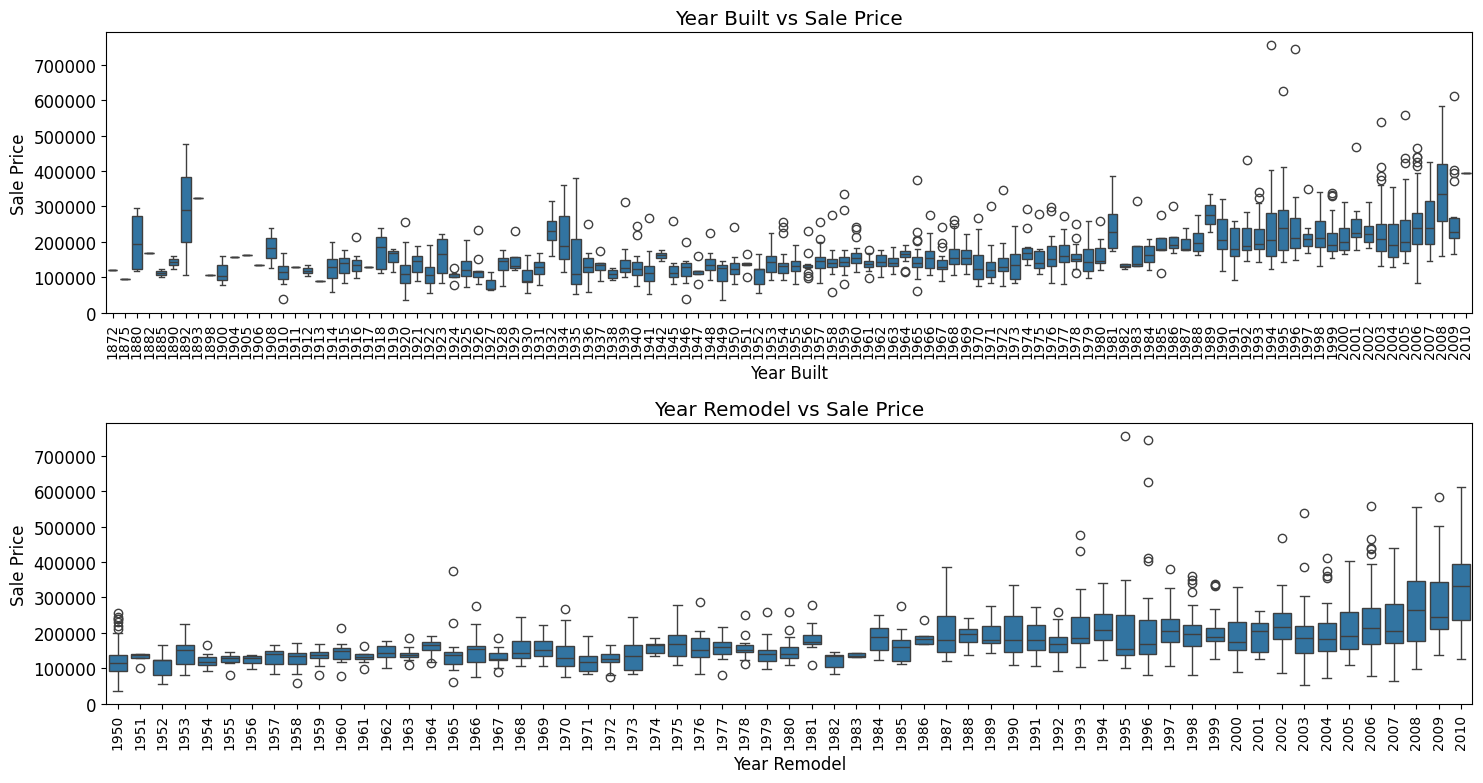

In [87]:
# Visualize the most correlated non-continuous features (OverallQual, GarageCars, FullBath, TotRmsAbvGrd, YearBuilt, YearRemodAdd) with the target variable (SalePrice)
fig = plt.figure(figsize=(15, 8))
plt.rcParams['font.size'] = 12

# Boxplot of OverallQual (Rates the overall material and finish of the house) vs SalePrice
fig.add_subplot(2,2,1)
sns.boxplot(x=data['OverallQual'], y=data['SalePrice'])
plt.title('Overall Quality vs Sale Price')
plt.xlabel('Overall Quality')
plt.ylabel('Sale Price')

# Boxplot of GarageCars (Size of garage in car capacity) vs SalePrice
fig.add_subplot(2,2,2)
sns.boxplot(x=data['GarageCars'], y=data['SalePrice'])
plt.title('Garage #Cars vs Sale Price')
plt.xlabel('Garage #Cars')
plt.ylabel('Sale Price')

# Boxplot of FullBath (Full bathrooms above grade) vs SalePrice
fig.add_subplot(2,2,3)
sns.boxplot(x=data['FullBath'], y=data['SalePrice'])
plt.title('Full Bathrooms Above Ground vs Sale Price')
plt.xlabel('Full Bathrooms Above Ground')
plt.ylabel('Sale Price')

# Boxplot of TotRmsAbvGrd (Total rooms above grade) vs SalePrice
fig.add_subplot(2,2,4)
sns.boxplot(x=data['TotRmsAbvGrd'], y=data['SalePrice'])
plt.title('Total Rooms Above Ground vs Sale Price')
plt.xlabel('Total Rooms Above Ground')
plt.ylabel('Sale Price')

plt.tight_layout()

fig = plt.figure(figsize=(15, 8))

# Boxplot of YearBuilt (Original construction date) vs SalePrice
fig.add_subplot(2,1,1)
sns.boxplot(x=data['YearBuilt'], y=data['SalePrice'])
plt.xticks(rotation=90, fontsize=10)
plt.title('Year Built vs Sale Price')
plt.xlabel('Year Built')
plt.ylabel('Sale Price')

# Boxplot of YearRemodAdd (Remodel date) vs SalePrice
fig.add_subplot(2,1,2)
sns.boxplot(x=data['YearRemodAdd'], y=data['SalePrice'])
plt.xticks(rotation=90, fontsize=10)
plt.title('Year Remodel vs Sale Price')
plt.xlabel('Year Remodel')
plt.ylabel('Sale Price')

plt.tight_layout()

**Overall Quality (OverallQual) vs. Sale Price:**
The boxplot shows a clear positive relationship between overall quality and sale price.
Higher overall quality ratings (8-10) correspond to significantly higher median sale prices compared to lower quality ratings (1-4).
There is a noticeable increase in the spread of sale prices as the quality rating increases, indicating more variability in prices for higher quality homes.
Outliers are present across all quality levels, with more pronounced outliers at higher quality levels, suggesting some exceptionally high-priced homes.

**Garage Cars (GarageCars) vs. Sale Price:**
The boxplot indicates a positive correlation between the number of cars a garage can hold and the sale price.
Houses with a garage capacity of 3 cars have the highest median sale prices.
There is a significant jump in sale prices when moving from no garage to a 1-car garage, and another jump from 2 to 3 cars.
Outliers are more prevalent in garages with capacities of 2 and 3 cars, indicating some high-priced homes with larger garages.

**Full Bathrooms Above Ground (FullBath) vs. Sale Price:**
The number of full bathrooms shows a positive correlation with sale price.
Houses with 2 full bathrooms have a higher median sale price compared to those with fewer bathrooms.
Houses with 3 full bathrooms have a wide range of prices, but the median is notably higher.
Outliers are present, particularly for houses with 2 and 3 bathrooms, indicating some high-value properties.

**Total Rooms Above Ground (TotRmsAbvGrd) vs. Sale Price:**
The total number of rooms above ground is positively correlated with sale price.
Houses with more rooms generally have higher median sale prices.
The spread of sale prices increases with the number of rooms, particularly for houses with 9 or more rooms.
Outliers are observed across all categories, with higher variability in houses with more rooms.

**Year Built (YearBuilt) vs. Sale Price:**
The boxplot shows a general upward trend in sale prices for houses built in more recent years.
Newer houses tend to have higher median sale prices.
The spread of sale prices is relatively consistent across different years, with some notable outliers in both older and newer houses.
Houses built after the 2000s show a higher concentration of higher sale prices.

**Year Remodeled (YearRemodAdd) vs. Sale Price:**
Houses remodeled in more recent years tend to have higher sale prices.
There is a noticeable increase in median sale prices for houses remodeled after the 1990s.
The spread of sale prices widens for more recent remodel years, indicating greater variability.
Outliers are present, particularly for houses remodeled in the 2000s, suggesting some high-value remodels.

The boxplots confirm the findings from the correlation analysis, showing that features such as OverallQual, GarageCars, FullBath, TotRmsAbvGrd, YearBuilt, and YearRemodAdd significantly influence house prices. Higher quality, more rooms, newer construction, and recent remodels are associated with higher sale prices. The presence of outliers in each boxplot highlights the variability in house prices and suggests the need for further investigation or potential handling in the modeling process.

### 2.4.3. Categorical Features

The next section focuses on visualizing categorical features to understand their impact on house prices. The selected features for this analysis are Neighborhood and MSZoning (zoning classification). These features have been chosen due to their significant influence on house prices, reflecting the importance of location and zoning regulations in determining property values.

Neighborhood: This feature captures the physical locations within the city, which often have distinct price trends and market conditions.

MSZoning: This feature indicates the general zoning classification of the sale, reflecting how the property is used and its surrounding environment.

While Neighborhood and MSZoning are critical factors, it is important to note that other categorical features not analyzed here, such as Condition1, BldgType, and HouseStyle, may also have a significant impact on house prices. These features could be explored in future analyses to provide a more comprehensive understanding of the various factors influencing property values.

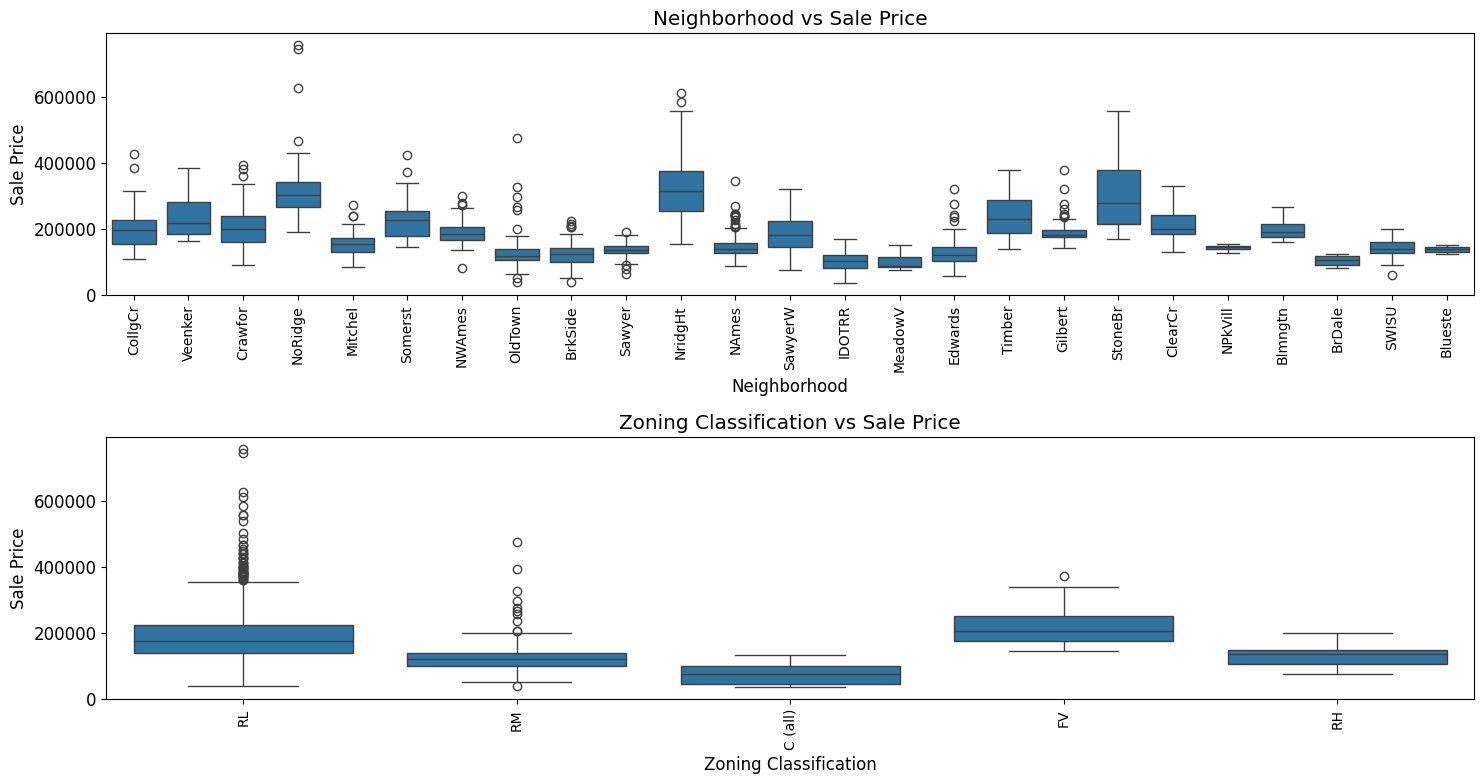

In [88]:
# Visualize relevant categorical features with the target variable (SalePrice)
fig = plt.figure(figsize=(15, 8))
plt.rcParams['font.size'] = 12

# Boxplot of Neighborhood (Physical locations within Ames city limits) vs SalePrice
fig.add_subplot(2,1,1)
sns.boxplot(x=data['Neighborhood'], y=data['SalePrice'])
plt.xticks(rotation=90, fontsize=10)
plt.title('Neighborhood vs Sale Price')
plt.xlabel('Neighborhood')
plt.ylabel('Sale Price')

# Boxplot of MSZoning (Identifies the general zoning classification of the sale) vs SalePrice
fig.add_subplot(2,1,2)
sns.boxplot(x=data['MSZoning'], y=data['SalePrice'])
plt.xticks(rotation=90, fontsize=10)
plt.title('Zoning Classification vs Sale Price')
plt.xlabel('Zoning Classification')
plt.ylabel('Sale Price')

plt.tight_layout()


**Neighborhood vs. Sale Price:**
The boxplot shows distinct variations in SalePrice across different neighborhoods.
NoRidge, NridgHt, and StoneBr neighborhoods have the highest median sale prices, indicating these are more affluent areas.
Outliers are present in almost all neighborhoods, indicating the presence of both exceptionally high and low-priced homes within each area.

**Zoning Classification (MSZoning) vs. Sale Price:**
The boxplot shows the distribution of SalePrice across different zoning classifications.
RL (Residential Low Density) zoning has the highest median sale price and the widest range, indicating a diverse set of house prices in this category.
FV (Floating Village Residential) also shows a high median sale price with less variability compared to RL.
RM (Residential Medium Density) and RH (Residential High Density) have lower median sale prices, with RH showing the narrowest range, indicating more uniformity in house prices within this zoning category.
C (all) (Commercial) zoning has fewer data points but shows a lower median sale price, reflecting potentially lower property values in commercial zones.

Although the zoning classifications suggest some differences in sale prices, they fall within an expected range. In contrast, the spread between neighborhoods reveals some interesting discrepancies. Notably, NoRidge, NridgHt, and StoneBr have significantly higher median prices compared to other neighborhoods.

To understand the impact of these discrepancies better, it is important to explore the distribution of sales across the neighborhoods. The next step will involve plotting the number of houses sold per region and the average price to determine if the prices in these regions could impact the predictive model. 

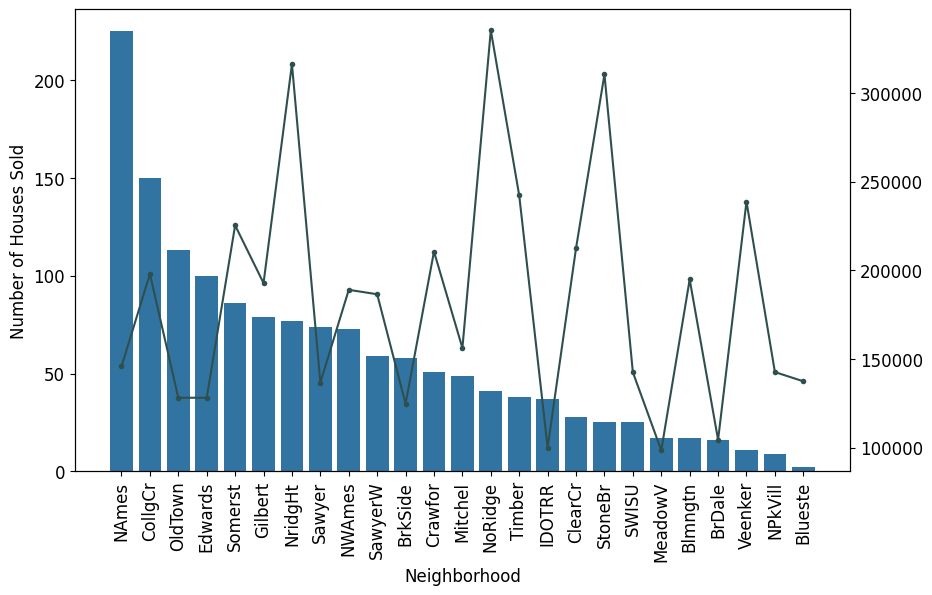

In [89]:
# Visualize the number of sales and average price per neighborhood
fig, ax1 = plt.subplots(figsize=(10, 6))
plt.rcParams['font.size'] = 12


# Sort the data by the number of houses sold per neighborhood
nbData_sorted = data['Neighborhood'].value_counts().sort_values(ascending=False)
nbData_sorted = pd.DataFrame(nbData_sorted)
nbData_sorted.reset_index(inplace=True)
nbData_sorted.columns = ['Neighborhood', 'Count']

# Create a bar plot for the number of houses sold per neighborhood
sns.barplot(x='Neighborhood', y='Count', data=nbData_sorted, ax=ax1)
plt.ylabel('Number of Houses Sold')
plt.xticks(rotation=90)

ax2 = ax1.twinx() # Create a second y-axis for the same plot
average_price = data.groupby('Neighborhood')['SalePrice'].mean() # Calculate the average price per neighborhood

# Create a line plot for the average price per neighborhood
sns.lineplot(x=average_price.index, y=average_price.values, marker='.', markersize=8, markeredgecolor='none', ax=ax2, color='#2F4F4F')


plt.xticks(rotation=90)
plt.show()

The chart indicates that a larger number of houses are being sold in neighborhoods with generally lower prices, such as NAmes and CollgCr. These regions with high sales volumes and moderate prices suggest that the bulk of the market activity occurs in more affordable areas. On the other hand, neighborhoods like NoRidge, NridgHt, and StoneBr, which have higher average sale prices, account for fewer sales.

From a modeling perspective, the high volume of sales in more affordable regions will likely balance the impact of higher prices in less active, more expensive neighborhoods. This balance ensures that the predictive model will be robust and representative of the overall market dynamics. Therefore, it is reasonable to create a model using data from all regions, as the diversity in sales volumes and prices across neighborhoods will provide a comprehensive view of the factors influencing house prices. This inclusive approach will enhance the model's accuracy and applicability across different market segments.

# 3. Preprocess Data

The preprocessing section is a critical step in preparing the dataset for predictive modeling. It involves cleaning and transforming the data to ensure that it is suitable for analysis and model building. Effective preprocessing helps improve the accuracy and efficiency of the predictive model by addressing issues such as missing values, data inconsistencies, and irrelevant features.

In this section, various preprocessing techniques will be applied, including:

**Handling Missing Values:** Identifying and addressing missing data to prevent biases and inaccuracies in the model.

**Feature Engineering:** Creating new features or transforming existing ones to better capture the underlying patterns in the data.

**Encoding Categorical Variables:** Converting categorical data into numerical format to make it compatible with machine learning algorithms.

**Scaling and Normalization:** Standardizing the range of continuous features to ensure uniformity and improve model performance.

**Outlier Detection and Treatment:** Identifying and managing outliers to minimize their impact on the model.

By meticulously preprocessing the data, the subsequent modeling efforts will be based on a clean, consistent, and well-structured dataset, ultimately leading to more accurate and reliable predictions.

## 3.1. Handling Missing Values

Handling missing values is crucial in data preprocessing because missing data can lead to biased estimates, reduce the statistical power of analyses, and negatively impact the performance of predictive models. Ignoring or improperly addressing missing values can result in inaccurate predictions and unreliable conclusions. Therefore, it is essential to identify, analyze, and appropriately handle missing data to ensure the integrity and accuracy of the dataset, thereby enhancing the quality and robustness of the predictive model.

In [90]:
# Identify missing values
missing_values = data.isnull().sum()
total_missing_values = missing_values.sum().sum()
print(missing_values)
print(f'\nTotal missing values: {total_missing_values}')

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Total missing values: 0


## 3.2. Handling Outliers

Handling outliers is essential in data preprocessing because outliers can skew statistical analyses, distort model performance, and lead to misleading conclusions. Outliers often represent anomalies or rare events that may not be representative of the underlying data distribution. By identifying and appropriately managing outliers, the dataset becomes more robust and the predictive model can more accurately capture the true patterns and relationships within the data. This step helps ensure that the model is not unduly influenced by extreme values, resulting in more reliable and accurate predictions.

In [91]:
# Define a function to drop rows with outliers based on the IQR method
def drop_outliersIQR(df, columns):
    """
    Drop outliers from the dataset based on the IQR method.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

# Define a function to drop rows with outliers based on seaborn interpretation for whiskers when using tuples.
### Seaborn uses percentiles to determine the whiskers in a boxplot when the parameter is a tuple.
### This method is more conservative than the IQR method
def drop_outliersSNS(df, columns):
    """
    Drop outliers from the dataset based on the seaborn interpretation for whiskers when using tuples.
    """
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        lower_bound = Q1
        upper_bound = Q3
        df = df[(df[col] > lower_bound) & (df[col] < upper_bound)]
    return df

The functions built for this analysis are capable of handling multiple outliers simultaneously, ensuring that the dataset remains robust and free from extreme values that could distort the model's performance. However, given the limited size of the dataset, it is important to retain a significant amount of data to maintain the quality and reliability of the model. Therefore, outlier removal will be restricted to the target variable, SalePrice, to minimize data loss. 

To determine the appropriate cleaning techniques, the shape and distribution of the target variable, SalePrice, will be carefully analyzed. By understanding the distribution characteristics, the most effective method for identifying and removing outliers can be selected. This targeted approach ensures that the integrity of the data is maintained while enhancing the model's accuracy and performance. In a larger, more representative dataset, extending outlier removal to all features would be recommended to further improve data quality and model robustness.

In [92]:
data = data.drop(columns=['Id']) # Drop column with no significant meaning for the analysis

clean_dataIQR = drop_outliersIQR(data, ['SalePrice']) # Drop outliers from the target variable (SalePrice) using the IQR method
clean_dataSNS = drop_outliersSNS(data, ['SalePrice']) # Drop outliers from the target variable (SalePrice) using the seaborn interpretation for whiskers when using tuples

print(f'\nData shape using IQR method: {clean_dataIQR.shape}')
print(f'Data shape using SNS method: {clean_dataSNS.shape}')


Data shape using IQR method: (1399, 80)
Data shape using SNS method: (728, 80)


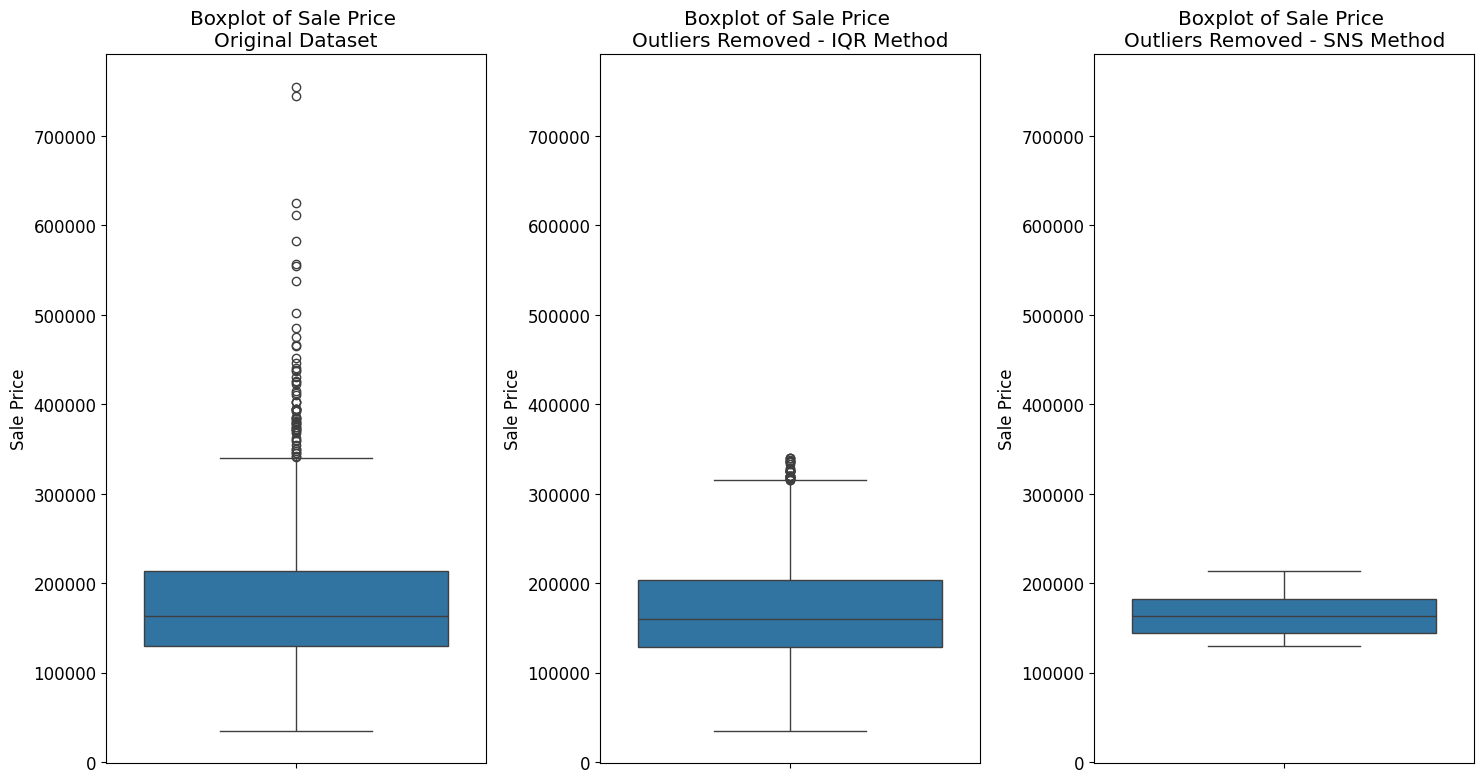

In [93]:
fig = plt.figure(figsize=(15,8))

# Boxplot of SalePrice before removing outliers
ax1 = fig.add_subplot(1,3,1)
sns.boxplot(data['SalePrice'])
plt.title('Boxplot of Sale Price \nOriginal Dataset')
plt.ylabel('Sale Price')

# Get the y-axis limits for the boxplots
y_min, y_max = ax1.get_ylim()

# Boxplot of SalePrice after removing outliers - IQR method
ax2 = fig.add_subplot(1,3,2)
sns.boxplot(clean_dataIQR['SalePrice'])
plt.title('Boxplot of Sale Price \nOutliers Removed - IQR Method')
plt.ylabel('Sale Price')
plt.ylim([y_min,y_max])

# Boxplot of SalePrice after removing outliers - SNS method
ax3 = fig.add_subplot(1,3,3)
sns.boxplot(clean_dataSNS['SalePrice'])
plt.title('Boxplot of Sale Price \nOutliers Removed - SNS Method')
plt.ylabel('Sale Price')
plt.ylim([y_min,y_max])

plt.tight_layout()

When addressing outliers in the dataset, it is essential to balance the removal of extreme values with the preservation of sufficient data for robust analysis and modeling. While the SNS method is extremely conservative and excludes a large portion of the dataset, the IQR method maintains a significant amount of data, ensuring the model's robustness and reliability. 

The boxplots show that the IQR method effectively reduces the impact of outliers on the SalePrice variable while preserving a larger dataset for analysis. This approach ensures that the model has enough data to learn from, without being skewed by extreme values. Therefore, the IQR method is chosen as the preferred technique for outlier cleaning in this analysis.

## 3.3. Handling Multicollinearity

To ensure the robustness of the predictive model, it is essential to address multicollinearity, which occurs when two or more features are highly correlated. High multicollinearity can distort the model's interpretation and reduce its predictive power. 

In [94]:
clean_dataIQR.head() # Use the dataset with outliers removed using the IQR method

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


Based on the correlation analysis, certain features exhibit high correlation with each other. To avoid multicollinearity, one feature from each pair of highly correlated variables will be dropped. Specifically, between GarageCars (number of garage cars) and GarageArea, GarageArea will be retained. Similarly, between TotalBsmtSF (total basement square feet) and 1stFlrSF (first floor square feet), 1stFlrSF will be retained. 

These choices are informed by previous knowledge and domain expertise, indicating that GarageArea and 1stFlrSF have a more significant impact on house prices, thereby contributing more effectively to the predictive model.

In [95]:
clean_data = clean_dataIQR.drop(columns=['GarageCars','TotalBsmtSF'])
clean_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65,8450,Pave,NA,Reg,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,2,2008,WD,Normal,208500
1,20,RL,80,9600,Pave,NA,Reg,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,5,2007,WD,Normal,181500
2,60,RL,68,11250,Pave,NA,IR1,Lvl,AllPub,Inside,...,0,NA,NA,NA,0,9,2008,WD,Normal,223500
3,70,RL,60,9550,Pave,NA,IR1,Lvl,AllPub,Corner,...,0,NA,NA,NA,0,2,2006,WD,Abnorml,140000
4,60,RL,84,14260,Pave,NA,IR1,Lvl,AllPub,FR2,...,0,NA,NA,NA,0,12,2008,WD,Normal,250000


## 3.3. Encoding

Encoding categorical features is a crucial step in data preprocessing for predictive modeling. Many machine learning algorithms require numerical input, and categorical data must be transformed into a numerical format to be properly utilized. Encoding techniques, such as one-hot encoding and label encoding, convert categorical variables into numerical values, enabling the algorithms to interpret and leverage these features. Proper encoding ensures that the dataset is fully compatible with the modeling process, allowing for accurate analysis and prediction.

Due to the large number of features in the dataset, the encoding process will be streamlined using the Label Encoder. Label Encoding is an efficient method for converting categorical variables into a numerical format by assigning a unique integer to each category. This approach is particularly useful when dealing with a high volume of categorical features, as it simplifies the encoding process and reduces the complexity of the dataset.

In [96]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [97]:
# Select categorical features
categorical = clean_data.select_dtypes(include=['object'])
categorical_columns = list(categorical.columns)

# Encode categorical features
for col in categorical_columns:
    clean_data[col] = le.fit_transform(clean_data[col])

clean_data.head()



,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,72,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,208500
1,20,3,87,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,181500
2,60,3,75,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,223500
3,70,3,67,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,140000
4,60,3,91,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,250000


## 3.4. Normalization

Normalization involves transforming the range of features to a standard scale, which is essential when a dataset contains features with varying ranges. Normalized data promotes faster convergence during gradient-based training, thereby improving the accuracy of the model. Additionally, normalization enhances the understanding of the dataset by making it easier to identify and visualize relationships between different features and to make meaningful comparisons.

There are multiple methods to normalize a dataset, with the most common being Min-Max Scaling and Z-score normalization. Min-Max Scaling transforms features to a fixed range, typically 0 to 1, but can be significantly impacted by outliers. Given that only the outliers for the target variable were treated in the preprocessing steps, using Min-Max Scaling could distort the normalization process, as the presence of untreated outliers would skew the values.

To mitigate the impact of these outliers, the Standardization technique (Z-score normalization) was chosen. Z-score normalization scales the features based on the mean and standard deviation, reducing the influence of outliers by centering the data around the mean with a standard deviation of one. This approach ensures a more robust normalization process, facilitating better performance and reliability of the predictive model.

In [98]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

### 3.4.1. Split dataset into training, validation, and test

Before applying normalization, the dataset will be split into training, validation, and test sets. It is crucial to fit the scaler individually for each of these splits to prevent data leakage. 

Data leakage occurs when information from the validation and test sets inadvertently influences the training process, leading to overly optimistic performance estimates and reducing the model's generalizability. By fitting the scaler separately for each subset, the model is trained and evaluated on properly standardized data, maintaining the integrity and validity of the predictive modeling process.


In [100]:
# Divide the dataset into features and target variable
X = clean_data.drop(columns=['SalePrice'], axis=1) # Define features
y = clean_data['SalePrice'] # Define target variable

# Split the dataset into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# View shape of the datasets
print(f'X_train shape: {X_train.shape}')
print(f'X_val shape: {X_val.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'\ny_train shape: {y_train.shape}')
print(f'y_val shape: {y_val.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (839, 77)
X_val shape: (280, 77)
X_test shape: (280, 77)

y_train shape: (839,)
y_val shape: (280,)
y_test shape: (280,)


### 3.4.2. Fit the transformer

With the dataset now split into training, validation, and test sets, the next step is to fit the transformer to the data. This involves applying the chosen normalization technique to each subset individually. To better visualize the changes brought about by this transformation, the description of the dataframes can be printed. This provides a clear overview of the statistical adjustments and ensures that the data has been properly scaled, facilitating an effective and consistent preprocessing workflow.

In [103]:
# Keep original dataframes untouched for reusability
X_train_norm = X_train.copy()
X_val_norm = X_val.copy()
X_test_norm = X_test.copy()

# Normalize the features
X_train_norm = scaler.fit_transform(X_train_norm)
X_val_norm = scaler.fit_transform(X_val_norm)
X_test_norm = scaler.fit_transform(X_test_norm)


X_train_norm_df = pd.DataFrame(X_train_norm, columns=X_train.columns) # Convert normalized features to DataFrame for better visualization
X_train_norm_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
MSSubClass,839.0,-5.504801e-17,1.000596,-0.881409,-0.881409,-0.186061,0.277504,3.058894
MSZoning,839.0,2.328954e-17,1.000596,-4.468212,-0.021201,-0.021201,-0.021201,1.461135
LotFrontage,839.0,4.657908e-17,1.000596,-2.835120,-0.475903,0.118696,0.694114,1.269533
LotArea,839.0,1.185649e-16,1.000596,-1.114465,-0.365197,-0.084639,0.141363,19.857719
Street,839.0,-2.117231e-17,1.000596,-14.448183,0.069213,0.069213,0.069213,0.069213
...,...,...,...,...,...,...,...,...
MiscVal,839.0,2.540677e-17,1.000596,-0.082777,-0.082777,-0.082777,-0.082777,24.441494
MoSold,839.0,-1.545579e-16,1.000596,-1.944357,-0.485546,-0.120843,0.608562,2.067374
YrSold,839.0,-1.237098e-14,1.000596,-1.360572,-0.601078,0.158417,0.917911,1.677405
SaleType,839.0,-2.244265e-16,1.000596,-4.582250,0.309759,0.309759,0.309759,0.309759


# 4. Model

The next phase of this project involves constructing and training the predictive model. Utilizing the Keras API available within the TensorFlow library, a powerful and flexible deep learning framework, an Artificial Neural Network (ANN) will be developed to predict house prices based on the preprocessed dataset. ANNs are particularly well-suited for capturing complex patterns and relationships within the data due to their layered structure and ability to learn non-linear mappings.

The Keras API simplifies the process of building and training neural networks, providing high-level abstractions and pre-built components that enhance both productivity and performance. By leveraging TensorFlow's capabilities, the model will benefit from efficient computation, scalability, and the ability to integrate seamlessly with other machine learning tools. This section will detail the architecture, training process, and evaluation metrics used to develop a robust and accurate predictive model.

In [108]:
# Import ANN libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

## 4.1. Feed-Foward Neural Network

### 4.1.1. Model Definition
The model will be built with three hidden layers, comprising 64, 32, and 16 neurons respectively, each using the ReLU activation function to introduce non-linearity and enhance learning capabilities. The final layer will consist of a single neuron, as the objective is to predict a continuous value for the final output. This architecture is designed to effectively capture complex patterns in the data and provide accurate regression predictions.

In [109]:
# Define the model
model = Sequential([
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1) # For regression, the output layer has a single neuron and a activation function is not necessary, since a continuous value is expected
])

### 4.1.2. Model Compilation
To compile the model, it is essential to define the optimizer, loss function, and evaluation metrics.

**Optimizer:**

Optimizers are algorithms used to change the attributes of a neural network, such as weights and learning rate, in order to reduce the losses. 

The Adam (Adaptive Moment Estimation) optimizer is widely regarded as a powerful and efficient optimization algorithm for training machine learning models. Adam combines the benefits of two other extensions of stochastic gradient descent: adaptive gradient algorithm (AdaGrad) and root mean square propagation (RMSProp). 

One of its key advantages is its ability to adaptively adjust the learning rate for each parameter, making it particularly effective for handling sparse gradients and non-stationary objectives. This adaptability often leads to faster convergence and more stable training compared to traditional optimization methods. Additionally, Adam's use of momentum helps smooth out updates, reducing oscillations and improving the overall training process.


**Loss Function:**

Loss functions are essential in training machine learning models as they measure the discrepancy between predicted values and actual targets. The primary goal during training is to minimize this loss, thereby enhancing the model's accuracy. In regression models, where the task is to predict continuous values, Mean Squared Error (MSE) is commonly used. MSE calculates the average of the squared differences between predicted and actual values, providing a clear measure of prediction accuracy.

Mean Squared Error is ideal for regression because it penalizes larger errors more heavily, making the model more sensitive to significant deviations. Its differentiable nature is crucial for gradient-based optimization algorithms, ensuring efficient minimization of error. Additionally, MSE is simple to implement and interpret, and its mathematical properties ensure convergence to a global minimum, provided proper scaling and learning rates. These attributes make MSE a reliable and effective loss function for regression tasks.

**Metrics:**

Metrics are essential in evaluating the performance of machine learning models. While loss functions guide the training process by quantifying the error between predictions and actual values, evaluation metrics provide an additional layer of insight into how well the model performs on unseen data. They help in assessing the model's accuracy, robustness, and generalizability, offering a comprehensive understanding of its strengths and weaknesses. 

Mean Absolute Error (MAE) is often considered the best choice for evaluating regression models because it measures the average magnitude of errors in a straightforward and interpretable manner. Unlike Mean Squared Error (MSE), which squares the errors and thus emphasizes larger deviations, MAE treats all errors equally by taking the absolute differences between predicted and actual values. This makes MAE more robust to outliers and provides a clear, intuitive measure of average prediction accuracy.



In [112]:
# Compile the model
model.compile(optimizer = 'adam',
              loss = 'mean_squared_error',
              metrics = ['mean_absolute_error'])

### 4.1.3. Model Training

An initial evaluation is conducted on the training and validation datasets to establish a reference point for its performance.

In [113]:
model.evaluate(X_train_norm, y_train) # Evaluate the model on the training set

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 664us/step - loss: 33804386304.0000 - mean_absolute_error: 173385.5000 


[33296867328.0, 172122.4375]

In [114]:
model.evaluate(X_val_norm, y_val) # Evaluate the model on the validation set

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30897475584.0000 - mean_absolute_error: 166196.7812 


[31531905024.0, 167528.0]

Before training, the model exhibits poor performance, characterized by an extremely high loss and a mean absolute error (MAE) exceeding $165,000 for both the training and validation sets. This MAE is close to the average SalePrice of $180,000, indicating that the model's predictions are no better than random guesses. Such performance is expected, as the model has not yet undergone any training to learn from the data.

The model is going to be trained using pre defined hyperparameters, as it follows.

In [115]:
history_pd = model.fit(X_train_norm, y_train, 
                       batch_size=16,
                       epochs=30, 
                       validation_data=(X_val_norm, y_val)) # Train the model on the training set

Epoch 1/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 34001944576.0000 - mean_absolute_error: 173769.5000 - val_loss: 31529957376.0000 - val_mean_absolute_error: 167522.5625
Epoch 2/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 32042420224.0000 - mean_absolute_error: 169395.0000 - val_loss: 31506436096.0000 - val_mean_absolute_error: 167463.0781
Epoch 3/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33361965056.0000 - mean_absolute_error: 172336.3281 - val_loss: 31337654272.0000 - val_mean_absolute_error: 167055.3281
Epoch 4/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 34066223104.0000 - mean_absolute_error: 174141.0156 - val_loss: 30687164416.0000 - val_mean_absolute_error: 165493.8906
Epoch 5/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 33239033856.0000 - mean_absolute_error: 171522.2188 - val_loss: 28999716864.0000 - val_mean_absolute_error: 161369.4219
Epoch 6/30
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 30194837504.0000 - mean_absolute_error: 164933.0938 